<a href="https://colab.research.google.com/github/Amrutha-220500/git/blob/main/movie_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/movies.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [30]:
df.shape

(1000, 9)

In [31]:
df.dtypes

,0
Rank,int64
Genre,object
Year,int64
Runtime (Minutes),int64
Rating,float64
Votes,int64
Revenue (Millions),float64
Metascore,float64
label,object


In [32]:
df.isnull().sum()


,0
Rank,0
Genre,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0
Revenue (Millions),0
Metascore,0
label,0


In [38]:
df=df.dropna(thresh=df.shape[1]-2)

In [39]:
df.shape

(1000, 9)

In [43]:
df

,Rank,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,label
0,1,"Action,Adventure,Sci-Fi",2014,121,8.1,757074,333.130000,76.0,High Rated
1,2,"Adventure,Mystery,Sci-Fi",2012,124,7.0,485820,126.460000,65.0,High Rated
2,3,"Horror,Thriller",2016,117,7.3,157606,138.120000,62.0,High Rated
3,4,"Animation,Comedy,Family",2016,108,7.2,60545,270.320000,59.0,High Rated
4,5,"Action,Adventure,Fantasy",2016,123,6.2,393727,325.020000,40.0,Low Rated
...,...,...,...,...,...,...,...,...,...
995,996,"Crime,Drama,Mystery",2015,111,6.2,27585,82.956376,45.0,Low Rated
996,997,Horror,2007,94,5.5,73152,17.540000,46.0,Low Rated
997,998,"Drama,Music,Romance",2008,98,6.2,70699,58.010000,50.0,Low Rated
998,999,"Adventure,Comedy",2014,93,5.6,4881,82.956376,22.0,Low Rated


In [65]:
df["Revenue (Millions)"] = df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].median())
df["Metascore"] = df["Metascore"].fillna(df["Metascore"].median())


In [66]:
df["label"] = df["Rating"].apply(lambda x: 1 if x >= 7 else 0)

In [67]:
df['label']

,label
0,1
1,1
2,1
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [68]:
from sklearn.preprocessing import LabelEncoder


df["Genre"] = LabelEncoder().fit_transform(df["Genre"])

features = ["Runtime (Minutes)", "Votes", "Revenue (Millions)", "Metascore", "Genre"]
X = df[features]
y = df["label"]

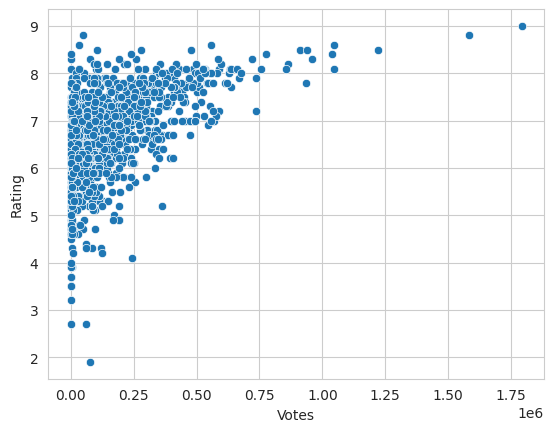

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Votes", y="Rating", data=df)
plt.show()



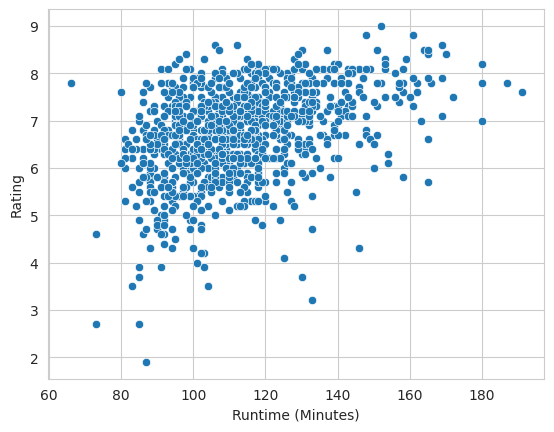

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Runtime", y="Rating", data=df)
plt.show()



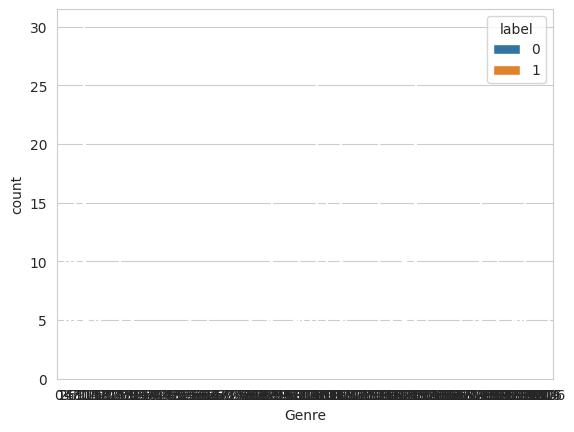

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Genre",hue="label",data=df)
plt.show()









In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

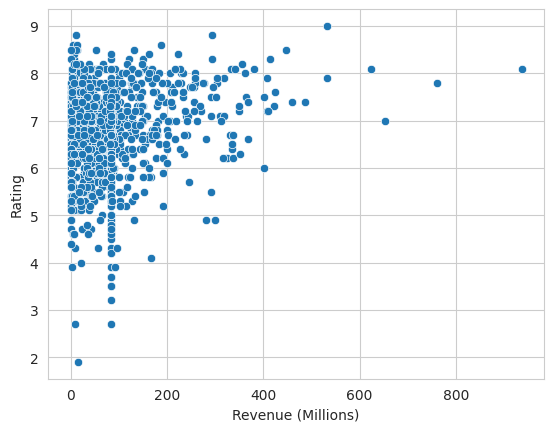

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating vs Votes
sns.scatterplot(x="Revenue (Millions)", y="Rating", data=df)
plt.show()


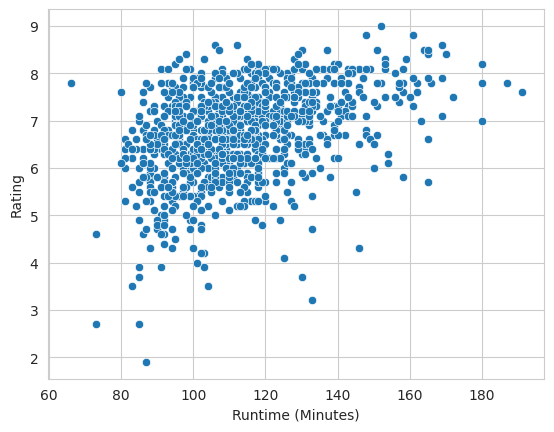

In [80]:
sns.scatterplot(x="Runtime (Minutes)", y="Rating", data=df)
plt.show()


In [64]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.81      0.75      0.78        89

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.81       200
weighted avg       0.81      0.81      0.81       200

